In [47]:
import numpy as np
import pandas as pd
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
# load dataset

# l= ["f1","f2","f3","f4","f5","f6","f7","f8","label"]
df= pd.read_csv("C:/Users/mkahs/REPOSITORY/DeepLearning---Natural-Language-Processing/Arup.csv", header=None, names=["f1","f2","f3","f4","f5","f6","f7","f8","label"])
# df = pd.ExcelFile(r"C:/Users/mkahs/REPOSITORY/DeepLearning---Natural-Language-Processing/Residential-Building-Data-Set.xlsx")
df.head()


train = df.loc[0:629]
# print(len(train))
# train.head()
Xtrain = train.iloc[:,0:8]
Ytrain = train.iloc[:,8]
Xtrain.reset_index(drop=True, inplace=True)
# Ytrain.head()


test = df.loc[630:944]
# print(len(test))
test.tail()
Xtest = test.iloc[:,0:8]
Ytest = test.iloc[:,8]
Xtest.reset_index(drop=True, inplace=True)
# Ytest.head()
print(Xtest)





           f1        f2        f3        f4        f5        f6        f7  \
0   -1.134372 -1.040787 -2.918179 -2.343683 -2.122019 -1.770788 -1.826998   
1   -1.083615 -0.984909 -2.350725 -1.927981 -1.910119 -1.642958 -1.699413   
2   -1.040667 -0.930662 -1.866428 -1.591406 -1.736889 -1.539434 -1.587129   
3   -1.016767 -0.906662 -1.650327 -1.469462 -1.708109 -1.454863 -1.508497   
4   -1.016226 -0.901794 -1.881274 -1.525240 -1.648155 -1.491204 -1.532957   
..        ...       ...       ...       ...       ...       ...       ...   
310  1.542389  1.324790  1.159979  1.194362  1.575499  0.483800  0.662278   
311  1.627053  1.395473  1.572554  1.263384  1.573165  0.420169  0.610495   
312  1.619996  1.389791  1.579942  1.266703  1.607932  0.396298  0.598001   
313  1.642734  1.408490  1.625269  1.287326  1.650222  0.419695  0.624853   
314  1.662778  1.425574  1.682732  1.323510  1.680046  0.442045  0.648468   

           f8  
0   -1.768924  
1   -1.632332  
2   -1.513628  
3   -1.4317

In [48]:
scaler = StandardScaler()

X_train = scaler.fit_transform(Xtrain.as_matrix())
y_train = scaler.fit_transform(Ytrain.as_matrix().reshape(-1, 1))

X_test = scaler.fit_transform(Xtest.as_matrix())
y_test = scaler.fit_transform(Ytest.as_matrix().reshape(-1, 1))

C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


Epoch 00037: early stopping
The R2 score on the Test set is:	0.883
630     29.102066
631     37.723714
632     46.305973
633     54.852359
634     56.625521
          ...    
940    214.124102
941    214.610637
942    215.056806
943    215.499522
944    215.942238
Name: label, Length: 315, dtype: float64
[[ 30.420141]
 [ 44.023624]
 [ 55.45284 ]
 [ 60.977146]
 [ 58.52827 ]
 [ 68.591255]
 [ 63.417126]
 [ 65.15415 ]
 [ 77.71948 ]
 [ 84.44684 ]
 [ 80.91334 ]
 [ 84.591805]
 [ 81.605316]
 [ 87.17702 ]
 [ 88.18751 ]
 [ 88.8863  ]
 [ 89.837105]
 [ 90.1928  ]
 [ 83.419975]
 [ 84.72785 ]
 [ 91.89513 ]
 [ 98.91329 ]
 [ 99.94101 ]
 [ 99.76534 ]
 [100.61498 ]
 [101.010956]
 [101.99859 ]
 [106.59307 ]
 [103.265305]
 [107.80849 ]
 [ 94.53137 ]
 [ 96.40276 ]
 [ 88.927505]
 [ 95.68632 ]
 [ 99.0938  ]
 [ 96.60858 ]
 [100.980125]
 [ 97.39295 ]
 [ 98.09115 ]
 [100.17917 ]
 [ 99.300156]
 [105.96289 ]
 [105.80701 ]
 [107.20321 ]
 [109.20228 ]
 [109.01368 ]
 [ 90.99053 ]
 [109.80622 ]
 [110.857864]
 [112.53

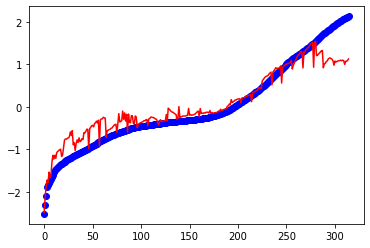

In [70]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='linear'))
# model.add(Dense(2, activation='linear'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])


y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
# print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

plt.plot(y_test,'bo',label='Actual')
plt.plot(y_test_pred,'r',label='Predicted')

print(Ytest)
print(scaler.inverse_transform(y_test_pred))

# print("The actual value: %.2f  and the predicted value: %.2f" %(Ytest, scaler.inverse_transform(y_test_pred)))

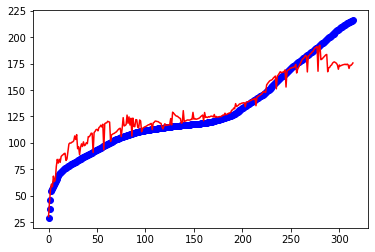

In [71]:
YTlist= list(Ytest)
# print(YTlist)
plt.plot(YTlist,'bo',label='Actual')
plt.plot(scaler.inverse_transform(y_test_pred),'r',label='Predicted')

In [67]:
import csv

Predlist = list(scaler.inverse_transform(y_test_pred))

Result = pd.DataFrame({'Actual':YTlist, 'Predicted':Predlist})

# Result.head()
Result.to_csv('numbers.csv', index=False)

In [58]:
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = scaler.inverse_transform(y_test_pred).flatten() - Ytest
percentDiff = (diff / Ytest) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print(mean)
print(std)
 
# finally, show some statistics on our model
# locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
# print("[INFO] avg. house price: {}, std house price: {}".format(
#     locale.currency(df["price"].mean(), grouping=True),
#     locale.currency(df["price"].std(), grouping=True)))
# print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

6.664252436301574
7.790312425487562


In [55]:
diff1 = (y_test_pred).flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print(mean)
print(std)

Exception: Data must be 1-dimensional

In [13]:
def create_model(max_features, num_class):
    def bm():
        model = Sequential()
        model.add(Dense(512, input_shape=(max_features,)))
        model.add(Activation('relu'))
        model.add(Dropout(0.3))
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(0.3))
        model.add(Dense(num_class, activation='relu'))
        model.summary()
        model.compile(
            loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        return model
    return bm

model_clf = KerasRegressor(
    build_fn=create_model(8, 1), epochs=10, 
    batch_size=32, verbose=2)
history = model_clf.fit(
                X_train, y_train,
                batch_size=32,
                epochs=10,
                verbose=2,
                validation_data=(X_test, y_test))

NameError: name 'Activation' is not defined

In [10]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_test, y_test, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
# estimator.fit(X_train,y_train)
prediction = estimator.predict(X_test)
print(prediction)

Baseline: -0.12 (0.17) MSE


AttributeError: 'KerasRegressor' object has no attribute 'model'

In [9]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, X_train, y_train, cv=kfold)
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
estimator.fit(X_train,y_train)
prediction = estimator.predict(X_test)

# print(y_test)
# print(prediction)

print(Ytest)
print(scaler.inverse_transform(prediction))

630     29.102066
631     37.723714
632     46.305973
633     54.852359
634     56.625521
          ...    
940    214.124102
941    214.610637
942    215.056806
943    215.499522
944    215.942238
Name: label, Length: 315, dtype: float64
[ 50.857838  60.349163  68.2775    71.88754   70.39151   75.883446
  73.49203   74.460976  75.17486   79.273544  77.12196   77.81021
  75.97984   79.69164   80.32287   81.43093   82.3143    83.24853
  78.23108   78.73945   81.68452   85.212105  86.09949   87.246284
  88.26476   88.97732   89.611244  90.107025  90.62942   91.09572
  83.17863   83.88814   83.87743   87.30927   88.044685  88.81421
  88.94901   90.42953   90.77377   91.39395   92.094925  92.60492
  92.95988   93.74107   94.78608   95.5333    85.4586    95.68207
  96.439896  97.0862    97.791885  98.37432   98.93464   98.90708
  99.87019  100.34479  100.696594  86.49772  101.4631   102.28981
 102.77876  103.94017  104.338036 104.93916   91.249535  94.703575
  95.62282   96.98781   97.45926